Lab 4 czesc 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('reviews_courses.csv')


In [3]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

C:\Users\preda\AppData\Local\Temp\ipykernel_14732\3422048874.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped_data = data.groupby(['Course Name', data['Timestamp'].dt.to_period('M')])


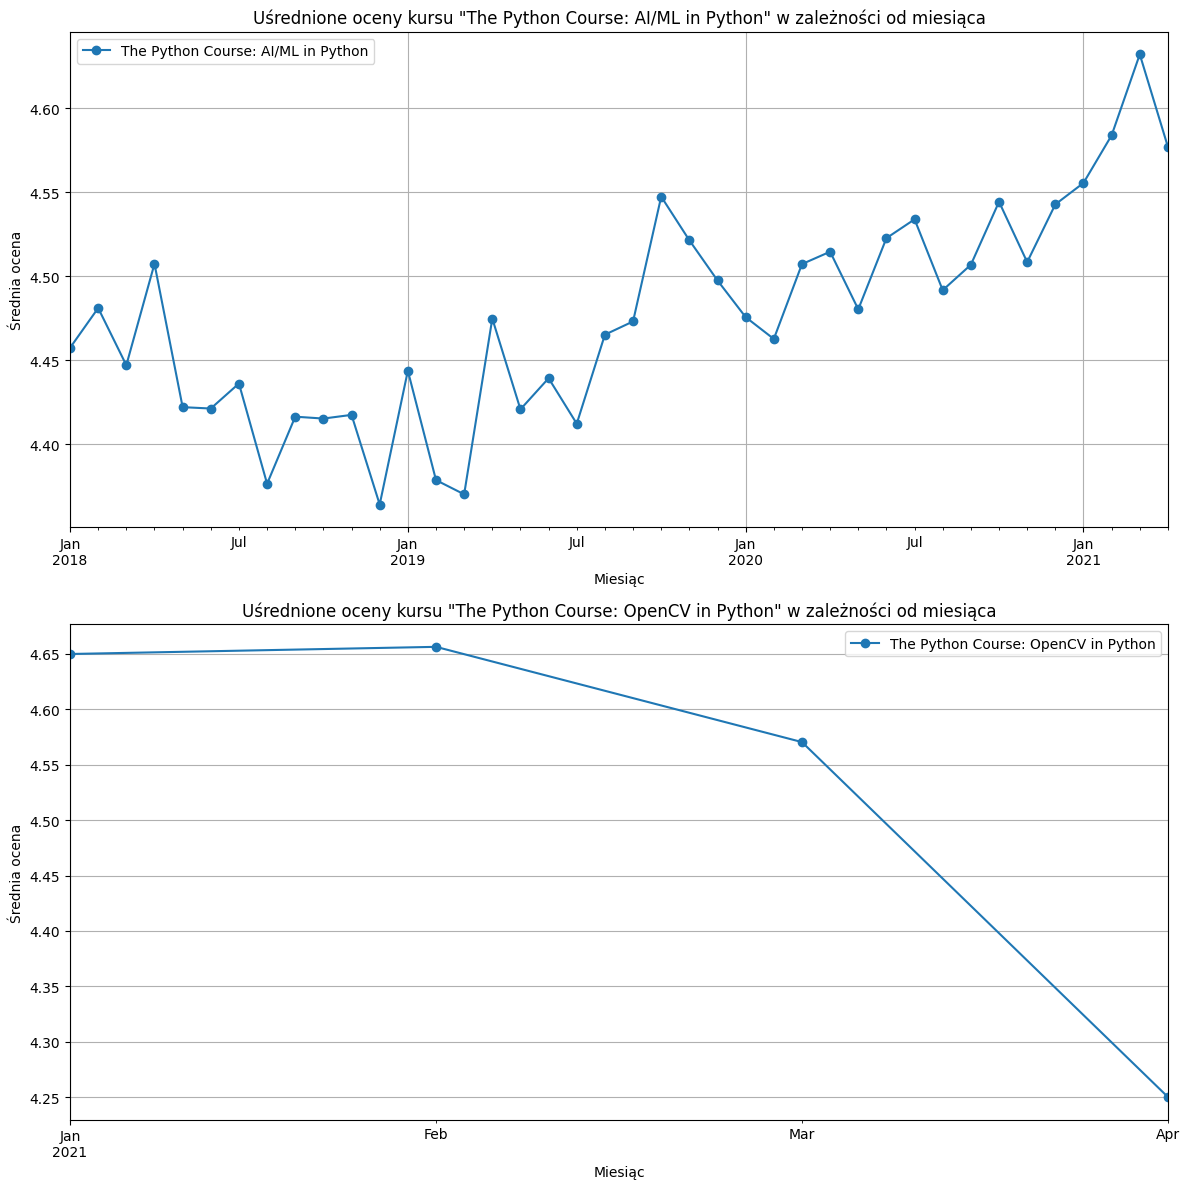

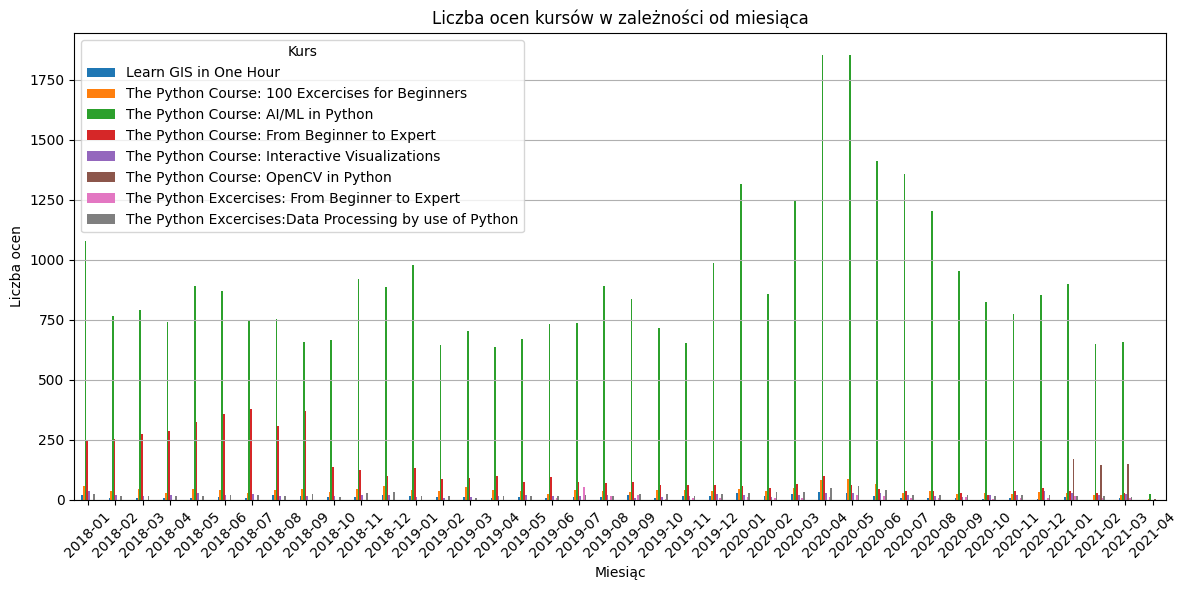

In [4]:
grouped_data = data.groupby(['Course Name', data['Timestamp'].dt.to_period('M')])
monthly_average_rating = grouped_data['Rating'].mean()
monthly_total_reviews = grouped_data.size()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
for ax, course in zip(axes, data['Course Name'].unique()):
    course_data = monthly_average_rating[course]
    course_data.plot(ax=ax, marker='o', linestyle='-')
    ax.set_title(f'Uśrednione oceny kursu "{course}" w zależności od miesiąca')
    ax.set_xlabel('Miesiąc')
    ax.set_ylabel('Średnia ocena')
    ax.grid(True)
    ax.legend([f'{course}'])
plt.tight_layout()
plt.show()
monthly_total_reviews.unstack(level=0).plot(kind='bar', figsize=(12, 6))
plt.title('Liczba ocen kursów w zależności od miesiąca')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba ocen')
plt.xticks(rotation=45)
plt.legend(title='Kurs')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [5]:
print(data.columns)


Index(['Course Name', 'Timestamp', 'Rating', 'Comment'], dtype='object')


In [6]:
data = pd.read_csv('reviews_courses.csv')


In [7]:
#month_avarage_course=data.groupby(['Month','Course Name']).mean(numeric_only=True)
#month_avarage_course.head()

In [8]:
#month_avarage_course.tail()

NameError: name 'month_avarage_course' is not defined

In [5]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_avarage_coutse=data.groupby(['Month','Course Name']).mean(numeric_only=True).unstack()
month_avarage_coutse.head()


Rating  \
Course Name Learn GIS in One Hour   
Month                               
2018-01                  4.236842   
2018-02                  4.437500   
2018-03                  4.166667   
2018-04                  4.250000   
2018-05                  4.666667   

                                                             \
Course Name The Python Course: 100 Excercises for Beginners   
Month                                                         
2018-01                                            4.353448   
2018-02                                            4.250000   
2018-03                                            4.500000   
2018-04                                            4.431034   
2018-05                                            4.358696   

                                                \
Course Name The Python Course: AI/ML in Python   
Month                                            
2018-01                               4.457368   
2018-02                               4.481070   
2018-03                               4.447037   
2018-04                               4.507412   
2018-05                               4.422085   

                                                        \
Course Name The Python Course: From Beginner to Expert   
Month                                                    
2018-01                                       4.355422   
2018-02                                       4.363095   
2018-03                                       4.357143   
2018-04                                       4.378947   
2018-05                                       4.362654   

                                                           \
Course Name The Python Course: Interactive Visualizations   
Month                                                       
2018-01                                          4.285714   
2018-02                                          4.157895   
2018-03                                          4.266667   
2018-04                                          4.428571   
2018-05                                          4.107143   

                                                 \
Course Name The Python Course: OpenCV in Python   
Month                                             
2018-01                                     NaN   
2018-02                                     NaN   
2018-03                                     NaN   
2018-04                                     NaN   
2018-05                                     NaN   

                                                            \
Course Name The Python Excercises: From Beginner to Expert   
Month                                                        
2018-01                                                NaN   
2018-02                                                NaN   
2018-03                                                NaN   
2018-04                                                NaN   
2018-05                                                NaN   

                                                                    
Course Name The Python Excercises:Data Processing by use of Python  
Month                                                               
2018-01                                               4.500000      
2018-02                                               4.205882      
2018-03                                               4.281250      
2018-04                                               4.468750      
2018-05                                               4.176471

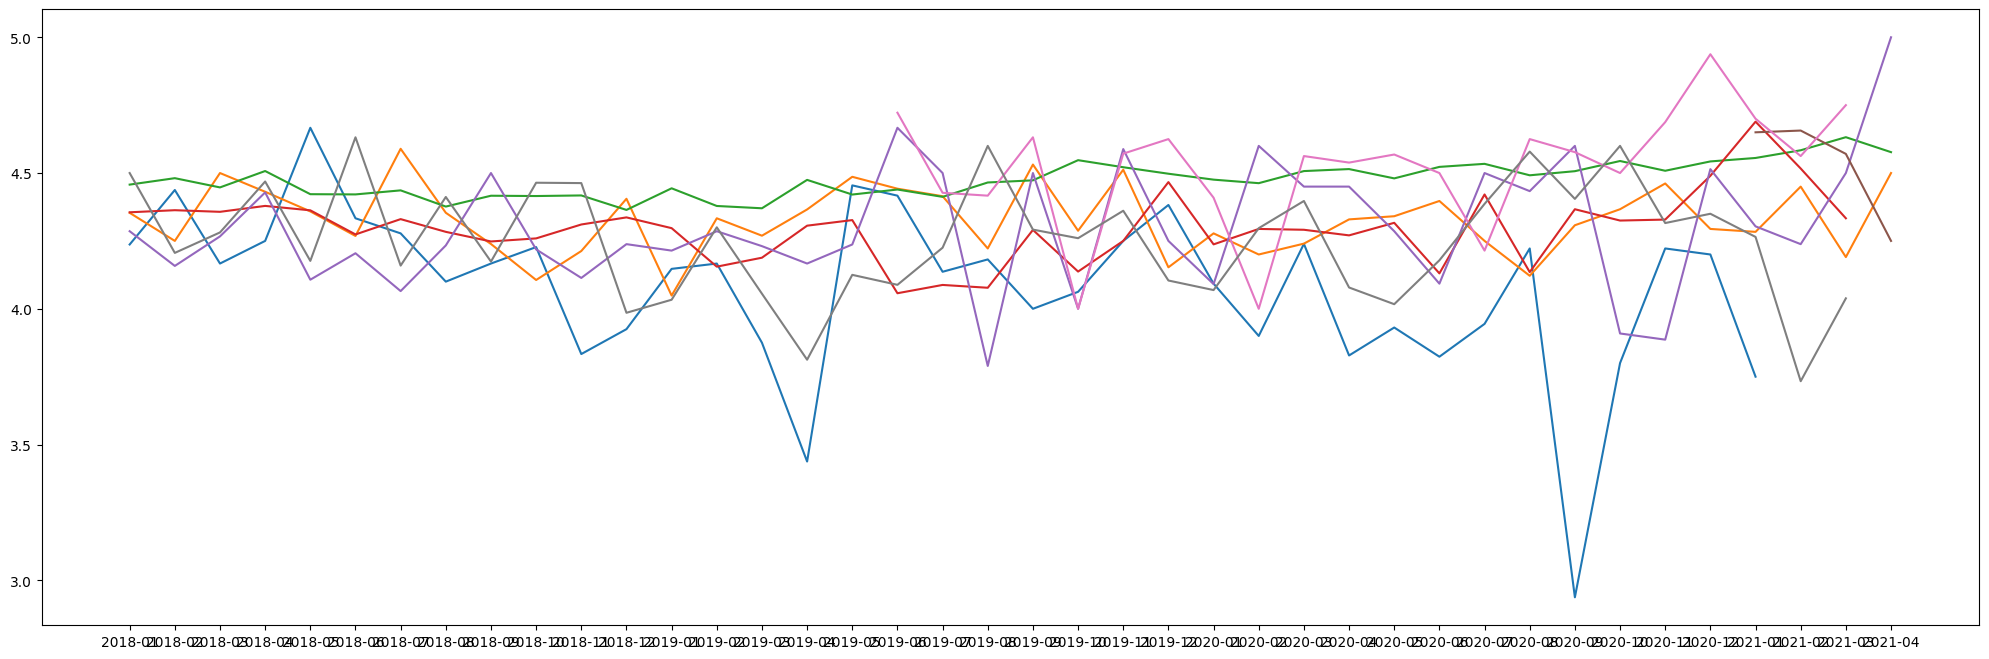

In [6]:
plt.figure(figsize=(25,8))
plt.plot(month_avarage_coutse.index,month_avarage_coutse['Rating'])

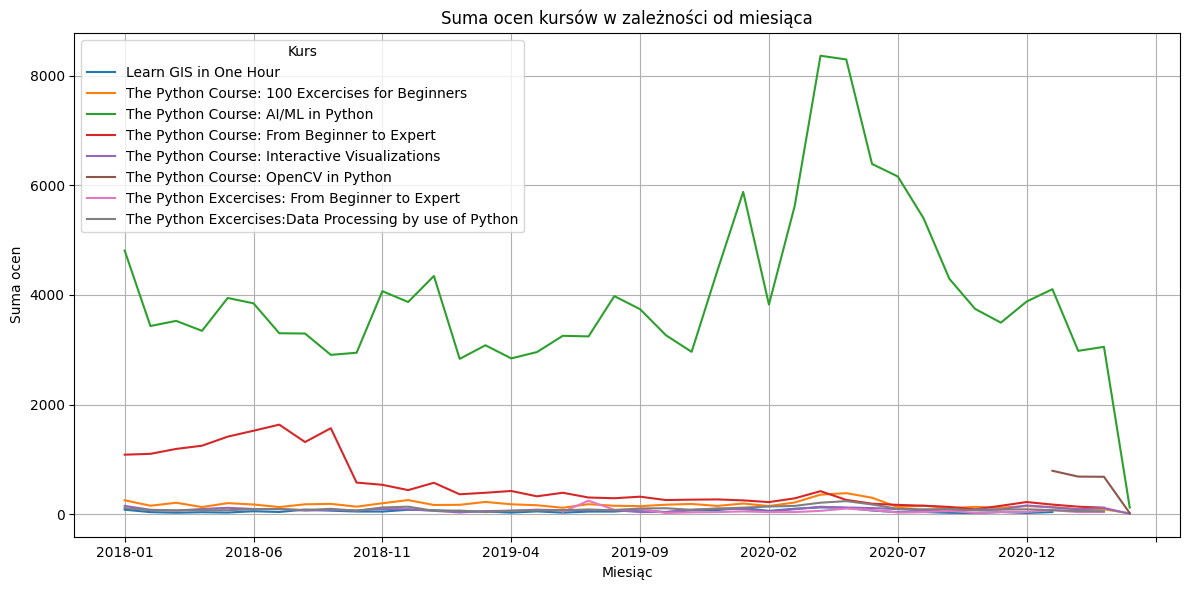

In [5]:
data = pd.read_csv('reviews_courses.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')


monthly_sum_rating = data.groupby(['Month', 'Course Name'])['Rating'].sum().unstack()
monthly_sum_rating.plot(kind='line', figsize=(12, 6))
plt.title('Suma ocen kursów w zależności od miesiąca')
plt.xlabel('Miesiąc')
plt.ylabel('Suma ocen')
plt.legend(title='Kurs')
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\preda\AppData\Local\Temp\ipykernel_20040\1364406785.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  average_daily_rating = data.groupby(data['Timestamp'].dt.to_period('D'))['Rating'].mean()


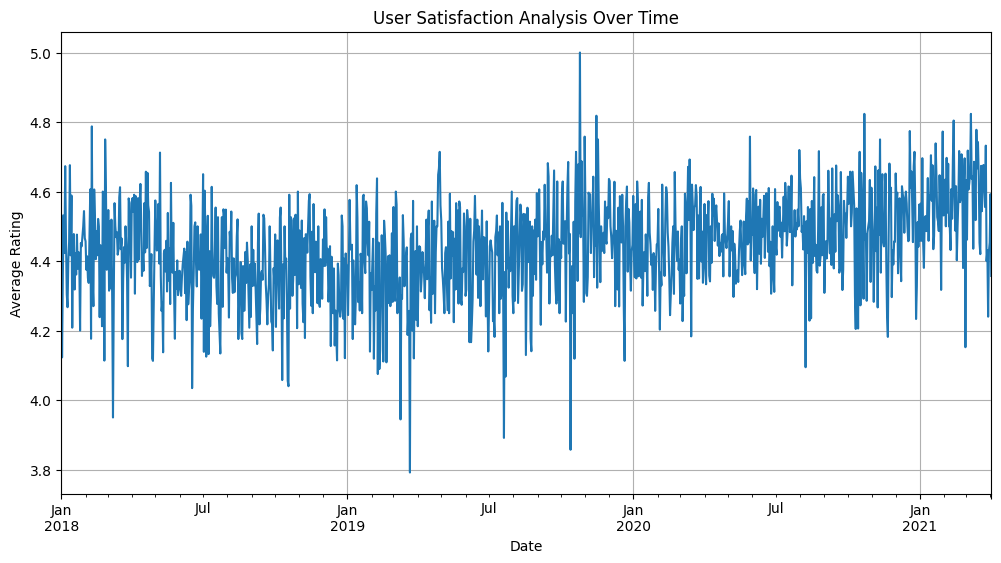

In [6]:
# Group data by Timestamp and calculate mean of Rating
average_daily_rating = data.groupby(data['Timestamp'].dt.to_period('D'))['Rating'].mean()

# Plot the average daily rating
average_daily_rating.plot(kind='line', figsize=(12, 6))
plt.title('User Satisfaction Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


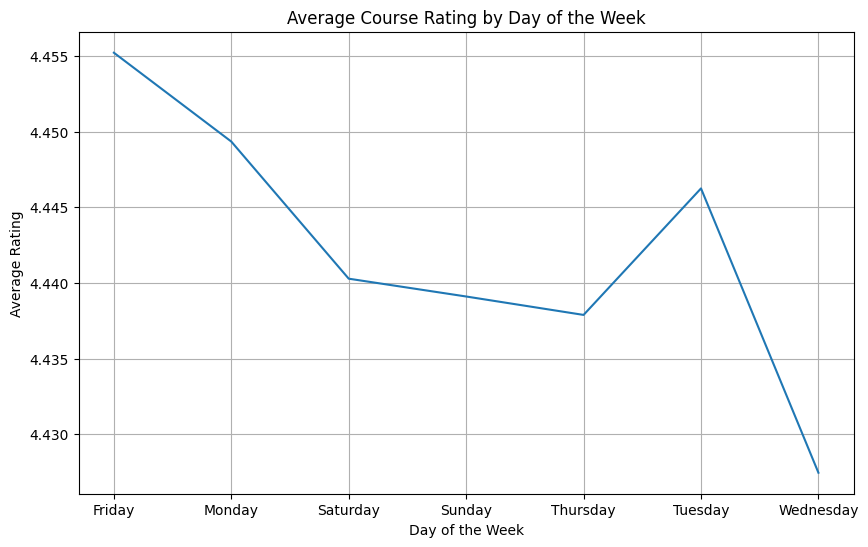

In [13]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['DayOfWeek'] = data['Timestamp'].dt.day_name()


# Group the data by the day of the week and calculate the average rating
average_rating_by_day = data.groupby('DayOfWeek')['Rating'].mean()

# Plot the average rating by day of the week
average_rating_by_day.plot(kind='line', figsize=(10, 6))
plt.title('Average Course Rating by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()